## 4.3　改良版 word2vec の学習

In [1]:
import os
import sys
import pickle
import numpy as np

In [2]:
os.chdir('/Users/yuta.shimizu/Downloads/ML/deep-learning-from-scratch-2-master/ch04')
sys.path.append(os.pardir)

In [3]:
from dataset import ptb
from common import config
from common.util import analogy
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import most_similar
from common.layers import Embedding
from common.util import create_contexts_target, to_cpu, to_gpu
from negative_sampling_layer import NegativeSamplingLoss

### 4.3.1　CBOW モデルの実装

In [4]:
class CBOW:
    def __init__(self, vocab_size, hidden_size, window_size, corpus):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(V, H).astype('f')
        
        self.in_layers = []
        for i in range(2 * window_size):
            layer = Embedding(W_in)
            self.in_layers.append(layer)
            
        self.ns_loss = NegativeSamplingLoss(W_out, corpus, power=0.75)
        
        layers = self.in_layers + [self.ns_loss]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs = W_in
    
    def forward(self, contexts, target):
        h = 0
        for i, layer in enumerate(self.in_layers):
            h += layer.forward(contexts[:, i])
        h *= 1 / len(self.in_layers)
        loss = self.ns_loss.forward(h, target)
        return loss
    
    def backward(self, dout=1):
        dout = self.ns_loss.backward(dout)
        dout *= 1 / len(self.in_layers)
        for layer in self.in_layers:
            layer.backward(dout)
        return None

### 4.3.2　CBOW モデルの学習コード

In [5]:
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

In [6]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)

In [7]:
model = CBOW(vocab_size, hidden_size, window_size, corpus)
optimizer = Adam()
trainer = Trainer(model, optimizer)

| epoch 1 |  iter 1 / 9295 | time 0[s] | loss 4.16
| epoch 1 |  iter 21 / 9295 | time 1[s] | loss 4.16
| epoch 1 |  iter 41 / 9295 | time 2[s] | loss 4.15
| epoch 1 |  iter 61 / 9295 | time 3[s] | loss 4.12
| epoch 1 |  iter 81 / 9295 | time 4[s] | loss 4.05
| epoch 1 |  iter 101 / 9295 | time 5[s] | loss 3.93
| epoch 1 |  iter 121 / 9295 | time 6[s] | loss 3.79
| epoch 1 |  iter 141 / 9295 | time 7[s] | loss 3.62
| epoch 1 |  iter 161 / 9295 | time 8[s] | loss 3.49
| epoch 1 |  iter 181 / 9295 | time 9[s] | loss 3.35
| epoch 1 |  iter 201 / 9295 | time 10[s] | loss 3.25
| epoch 1 |  iter 221 / 9295 | time 11[s] | loss 3.17
| epoch 1 |  iter 241 / 9295 | time 12[s] | loss 3.09
| epoch 1 |  iter 261 / 9295 | time 13[s] | loss 3.01
| epoch 1 |  iter 281 / 9295 | time 15[s] | loss 2.95
| epoch 1 |  iter 301 / 9295 | time 16[s] | loss 2.91
| epoch 1 |  iter 321 / 9295 | time 17[s] | loss 2.88
| epoch 1 |  iter 341 / 9295 | time 18[s] | loss 2.84
| epoch 1 |  iter 361 / 9295 | time 19[s] | 

| epoch 1 |  iter 3001 / 9295 | time 156[s] | loss 2.44
| epoch 1 |  iter 3021 / 9295 | time 157[s] | loss 2.45
| epoch 1 |  iter 3041 / 9295 | time 158[s] | loss 2.44
| epoch 1 |  iter 3061 / 9295 | time 159[s] | loss 2.43
| epoch 1 |  iter 3081 / 9295 | time 160[s] | loss 2.41
| epoch 1 |  iter 3101 / 9295 | time 161[s] | loss 2.42
| epoch 1 |  iter 3121 / 9295 | time 162[s] | loss 2.44
| epoch 1 |  iter 3141 / 9295 | time 163[s] | loss 2.43
| epoch 1 |  iter 3161 / 9295 | time 164[s] | loss 2.45
| epoch 1 |  iter 3181 / 9295 | time 165[s] | loss 2.43
| epoch 1 |  iter 3201 / 9295 | time 166[s] | loss 2.43
| epoch 1 |  iter 3221 / 9295 | time 167[s] | loss 2.43
| epoch 1 |  iter 3241 / 9295 | time 168[s] | loss 2.44
| epoch 1 |  iter 3261 / 9295 | time 169[s] | loss 2.42
| epoch 1 |  iter 3281 / 9295 | time 170[s] | loss 2.44
| epoch 1 |  iter 3301 / 9295 | time 171[s] | loss 2.45
| epoch 1 |  iter 3321 / 9295 | time 172[s] | loss 2.44
| epoch 1 |  iter 3341 / 9295 | time 173[s] | lo

| epoch 1 |  iter 5941 / 9295 | time 307[s] | loss 2.33
| epoch 1 |  iter 5961 / 9295 | time 308[s] | loss 2.36
| epoch 1 |  iter 5981 / 9295 | time 309[s] | loss 2.34
| epoch 1 |  iter 6001 / 9295 | time 310[s] | loss 2.33
| epoch 1 |  iter 6021 / 9295 | time 311[s] | loss 2.32
| epoch 1 |  iter 6041 / 9295 | time 312[s] | loss 2.34
| epoch 1 |  iter 6061 / 9295 | time 314[s] | loss 2.30
| epoch 1 |  iter 6081 / 9295 | time 315[s] | loss 2.30
| epoch 1 |  iter 6101 / 9295 | time 316[s] | loss 2.37
| epoch 1 |  iter 6121 / 9295 | time 317[s] | loss 2.30
| epoch 1 |  iter 6141 / 9295 | time 318[s] | loss 2.27
| epoch 1 |  iter 6161 / 9295 | time 319[s] | loss 2.29
| epoch 1 |  iter 6181 / 9295 | time 320[s] | loss 2.34
| epoch 1 |  iter 6201 / 9295 | time 321[s] | loss 2.35
| epoch 1 |  iter 6221 / 9295 | time 322[s] | loss 2.31
| epoch 1 |  iter 6241 / 9295 | time 323[s] | loss 2.33
| epoch 1 |  iter 6261 / 9295 | time 324[s] | loss 2.31
| epoch 1 |  iter 6281 / 9295 | time 325[s] | lo

| epoch 1 |  iter 8881 / 9295 | time 459[s] | loss 2.22
| epoch 1 |  iter 8901 / 9295 | time 460[s] | loss 2.24
| epoch 1 |  iter 8921 / 9295 | time 461[s] | loss 2.23
| epoch 1 |  iter 8941 / 9295 | time 462[s] | loss 2.21
| epoch 1 |  iter 8961 / 9295 | time 463[s] | loss 2.22
| epoch 1 |  iter 8981 / 9295 | time 464[s] | loss 2.27
| epoch 1 |  iter 9001 / 9295 | time 465[s] | loss 2.21
| epoch 1 |  iter 9021 / 9295 | time 466[s] | loss 2.23
| epoch 1 |  iter 9041 / 9295 | time 467[s] | loss 2.21
| epoch 1 |  iter 9061 / 9295 | time 468[s] | loss 2.20
| epoch 1 |  iter 9081 / 9295 | time 469[s] | loss 2.24
| epoch 1 |  iter 9101 / 9295 | time 470[s] | loss 2.23
| epoch 1 |  iter 9121 / 9295 | time 471[s] | loss 2.22
| epoch 1 |  iter 9141 / 9295 | time 472[s] | loss 2.20
| epoch 1 |  iter 9161 / 9295 | time 473[s] | loss 2.24
| epoch 1 |  iter 9181 / 9295 | time 475[s] | loss 2.25
| epoch 1 |  iter 9201 / 9295 | time 476[s] | loss 2.21
| epoch 1 |  iter 9221 / 9295 | time 477[s] | lo

| epoch 2 |  iter 2541 / 9295 | time 613[s] | loss 2.11
| epoch 2 |  iter 2561 / 9295 | time 614[s] | loss 2.09
| epoch 2 |  iter 2581 / 9295 | time 615[s] | loss 2.14
| epoch 2 |  iter 2601 / 9295 | time 616[s] | loss 2.15
| epoch 2 |  iter 2621 / 9295 | time 617[s] | loss 2.09
| epoch 2 |  iter 2641 / 9295 | time 618[s] | loss 2.14
| epoch 2 |  iter 2661 / 9295 | time 619[s] | loss 2.12
| epoch 2 |  iter 2681 / 9295 | time 620[s] | loss 2.13
| epoch 2 |  iter 2701 / 9295 | time 621[s] | loss 2.11
| epoch 2 |  iter 2721 / 9295 | time 622[s] | loss 2.11
| epoch 2 |  iter 2741 / 9295 | time 623[s] | loss 2.12
| epoch 2 |  iter 2761 / 9295 | time 624[s] | loss 2.14
| epoch 2 |  iter 2781 / 9295 | time 625[s] | loss 2.11
| epoch 2 |  iter 2801 / 9295 | time 626[s] | loss 2.11
| epoch 2 |  iter 2821 / 9295 | time 627[s] | loss 2.08
| epoch 2 |  iter 2841 / 9295 | time 628[s] | loss 2.10
| epoch 2 |  iter 2861 / 9295 | time 629[s] | loss 2.10
| epoch 2 |  iter 2881 / 9295 | time 630[s] | lo

| epoch 2 |  iter 5481 / 9295 | time 765[s] | loss 2.03
| epoch 2 |  iter 5501 / 9295 | time 766[s] | loss 2.09
| epoch 2 |  iter 5521 / 9295 | time 767[s] | loss 2.05
| epoch 2 |  iter 5541 / 9295 | time 768[s] | loss 2.07
| epoch 2 |  iter 5561 / 9295 | time 769[s] | loss 2.09
| epoch 2 |  iter 5581 / 9295 | time 770[s] | loss 2.06
| epoch 2 |  iter 5601 / 9295 | time 771[s] | loss 2.03
| epoch 2 |  iter 5621 / 9295 | time 772[s] | loss 2.04
| epoch 2 |  iter 5641 / 9295 | time 773[s] | loss 2.04
| epoch 2 |  iter 5661 / 9295 | time 774[s] | loss 2.08
| epoch 2 |  iter 5681 / 9295 | time 775[s] | loss 2.09
| epoch 2 |  iter 5701 / 9295 | time 776[s] | loss 2.05
| epoch 2 |  iter 5721 / 9295 | time 778[s] | loss 2.11
| epoch 2 |  iter 5741 / 9295 | time 779[s] | loss 2.06
| epoch 2 |  iter 5761 / 9295 | time 780[s] | loss 2.02
| epoch 2 |  iter 5781 / 9295 | time 781[s] | loss 2.06
| epoch 2 |  iter 5801 / 9295 | time 782[s] | loss 2.09
| epoch 2 |  iter 5821 / 9295 | time 783[s] | lo

| epoch 2 |  iter 8421 / 9295 | time 918[s] | loss 2.05
| epoch 2 |  iter 8441 / 9295 | time 919[s] | loss 1.99
| epoch 2 |  iter 8461 / 9295 | time 920[s] | loss 2.02
| epoch 2 |  iter 8481 / 9295 | time 921[s] | loss 2.00
| epoch 2 |  iter 8501 / 9295 | time 922[s] | loss 2.01
| epoch 2 |  iter 8521 / 9295 | time 923[s] | loss 2.03
| epoch 2 |  iter 8541 / 9295 | time 924[s] | loss 2.01
| epoch 2 |  iter 8561 / 9295 | time 925[s] | loss 2.03
| epoch 2 |  iter 8581 / 9295 | time 926[s] | loss 2.02
| epoch 2 |  iter 8601 / 9295 | time 927[s] | loss 2.00
| epoch 2 |  iter 8621 / 9295 | time 928[s] | loss 2.03
| epoch 2 |  iter 8641 / 9295 | time 929[s] | loss 2.03
| epoch 2 |  iter 8661 / 9295 | time 930[s] | loss 1.98
| epoch 2 |  iter 8681 / 9295 | time 931[s] | loss 2.02
| epoch 2 |  iter 8701 / 9295 | time 932[s] | loss 2.00
| epoch 2 |  iter 8721 / 9295 | time 933[s] | loss 2.02
| epoch 2 |  iter 8741 / 9295 | time 934[s] | loss 2.02
| epoch 2 |  iter 8761 / 9295 | time 935[s] | lo

| epoch 3 |  iter 2061 / 9295 | time 1069[s] | loss 1.97
| epoch 3 |  iter 2081 / 9295 | time 1070[s] | loss 1.93
| epoch 3 |  iter 2101 / 9295 | time 1071[s] | loss 1.93
| epoch 3 |  iter 2121 / 9295 | time 1072[s] | loss 1.96
| epoch 3 |  iter 2141 / 9295 | time 1073[s] | loss 1.93
| epoch 3 |  iter 2161 / 9295 | time 1074[s] | loss 1.93
| epoch 3 |  iter 2181 / 9295 | time 1075[s] | loss 1.95
| epoch 3 |  iter 2201 / 9295 | time 1076[s] | loss 1.94
| epoch 3 |  iter 2221 / 9295 | time 1077[s] | loss 1.92
| epoch 3 |  iter 2241 / 9295 | time 1078[s] | loss 1.92
| epoch 3 |  iter 2261 / 9295 | time 1079[s] | loss 1.93
| epoch 3 |  iter 2281 / 9295 | time 1080[s] | loss 1.97
| epoch 3 |  iter 2301 / 9295 | time 1081[s] | loss 1.97
| epoch 3 |  iter 2321 / 9295 | time 1082[s] | loss 1.97
| epoch 3 |  iter 2341 / 9295 | time 1083[s] | loss 1.92
| epoch 3 |  iter 2361 / 9295 | time 1085[s] | loss 1.90
| epoch 3 |  iter 2381 / 9295 | time 1086[s] | loss 1.91
| epoch 3 |  iter 2401 / 9295 |

| epoch 3 |  iter 4941 / 9295 | time 1218[s] | loss 1.90
| epoch 3 |  iter 4961 / 9295 | time 1219[s] | loss 1.90
| epoch 3 |  iter 4981 / 9295 | time 1220[s] | loss 1.94
| epoch 3 |  iter 5001 / 9295 | time 1221[s] | loss 1.89
| epoch 3 |  iter 5021 / 9295 | time 1222[s] | loss 1.96
| epoch 3 |  iter 5041 / 9295 | time 1223[s] | loss 1.89
| epoch 3 |  iter 5061 / 9295 | time 1224[s] | loss 1.95
| epoch 3 |  iter 5081 / 9295 | time 1225[s] | loss 1.95
| epoch 3 |  iter 5101 / 9295 | time 1226[s] | loss 1.87
| epoch 3 |  iter 5121 / 9295 | time 1227[s] | loss 1.89
| epoch 3 |  iter 5141 / 9295 | time 1228[s] | loss 1.90
| epoch 3 |  iter 5161 / 9295 | time 1229[s] | loss 1.93
| epoch 3 |  iter 5181 / 9295 | time 1230[s] | loss 1.92
| epoch 3 |  iter 5201 / 9295 | time 1231[s] | loss 1.90
| epoch 3 |  iter 5221 / 9295 | time 1232[s] | loss 1.91
| epoch 3 |  iter 5241 / 9295 | time 1233[s] | loss 1.90
| epoch 3 |  iter 5261 / 9295 | time 1234[s] | loss 1.90
| epoch 3 |  iter 5281 / 9295 |

| epoch 3 |  iter 7821 / 9295 | time 1366[s] | loss 1.88
| epoch 3 |  iter 7841 / 9295 | time 1367[s] | loss 1.91
| epoch 3 |  iter 7861 / 9295 | time 1368[s] | loss 1.88
| epoch 3 |  iter 7881 / 9295 | time 1369[s] | loss 1.87
| epoch 3 |  iter 7901 / 9295 | time 1370[s] | loss 1.86
| epoch 3 |  iter 7921 / 9295 | time 1371[s] | loss 1.86
| epoch 3 |  iter 7941 / 9295 | time 1372[s] | loss 1.91
| epoch 3 |  iter 7961 / 9295 | time 1373[s] | loss 1.86
| epoch 3 |  iter 7981 / 9295 | time 1374[s] | loss 1.90
| epoch 3 |  iter 8001 / 9295 | time 1375[s] | loss 1.90
| epoch 3 |  iter 8021 / 9295 | time 1376[s] | loss 1.91
| epoch 3 |  iter 8041 / 9295 | time 1377[s] | loss 1.89
| epoch 3 |  iter 8061 / 9295 | time 1378[s] | loss 1.89
| epoch 3 |  iter 8081 / 9295 | time 1379[s] | loss 1.89
| epoch 3 |  iter 8101 / 9295 | time 1380[s] | loss 1.87
| epoch 3 |  iter 8121 / 9295 | time 1381[s] | loss 1.87
| epoch 3 |  iter 8141 / 9295 | time 1382[s] | loss 1.87
| epoch 3 |  iter 8161 / 9295 |

| epoch 4 |  iter 1421 / 9295 | time 1515[s] | loss 1.79
| epoch 4 |  iter 1441 / 9295 | time 1516[s] | loss 1.85
| epoch 4 |  iter 1461 / 9295 | time 1517[s] | loss 1.78
| epoch 4 |  iter 1481 / 9295 | time 1518[s] | loss 1.81
| epoch 4 |  iter 1501 / 9295 | time 1519[s] | loss 1.84
| epoch 4 |  iter 1521 / 9295 | time 1520[s] | loss 1.82
| epoch 4 |  iter 1541 / 9295 | time 1521[s] | loss 1.82
| epoch 4 |  iter 1561 / 9295 | time 1522[s] | loss 1.79
| epoch 4 |  iter 1581 / 9295 | time 1523[s] | loss 1.80
| epoch 4 |  iter 1601 / 9295 | time 1524[s] | loss 1.81
| epoch 4 |  iter 1621 / 9295 | time 1525[s] | loss 1.81
| epoch 4 |  iter 1641 / 9295 | time 1526[s] | loss 1.80
| epoch 4 |  iter 1661 / 9295 | time 1527[s] | loss 1.82
| epoch 4 |  iter 1681 / 9295 | time 1528[s] | loss 1.84
| epoch 4 |  iter 1701 / 9295 | time 1529[s] | loss 1.83
| epoch 4 |  iter 1721 / 9295 | time 1530[s] | loss 1.79
| epoch 4 |  iter 1741 / 9295 | time 1531[s] | loss 1.81
| epoch 4 |  iter 1761 / 9295 |

| epoch 4 |  iter 4301 / 9295 | time 2768[s] | loss 1.78
| epoch 4 |  iter 4321 / 9295 | time 2769[s] | loss 1.83
| epoch 4 |  iter 4341 / 9295 | time 2770[s] | loss 1.83
| epoch 4 |  iter 4361 / 9295 | time 2771[s] | loss 1.83
| epoch 4 |  iter 4381 / 9295 | time 2772[s] | loss 1.83
| epoch 4 |  iter 4401 / 9295 | time 2773[s] | loss 1.82
| epoch 4 |  iter 4421 / 9295 | time 2775[s] | loss 1.79
| epoch 4 |  iter 4441 / 9295 | time 2776[s] | loss 1.79
| epoch 4 |  iter 4461 / 9295 | time 2777[s] | loss 1.78
| epoch 4 |  iter 4481 / 9295 | time 2778[s] | loss 1.81
| epoch 4 |  iter 4501 / 9295 | time 2779[s] | loss 1.82
| epoch 4 |  iter 4521 / 9295 | time 2781[s] | loss 1.77
| epoch 4 |  iter 4541 / 9295 | time 2782[s] | loss 1.79
| epoch 4 |  iter 4561 / 9295 | time 2783[s] | loss 1.79
| epoch 4 |  iter 4581 / 9295 | time 2784[s] | loss 1.87
| epoch 4 |  iter 4601 / 9295 | time 2785[s] | loss 1.77
| epoch 4 |  iter 4621 / 9295 | time 2786[s] | loss 1.80
| epoch 4 |  iter 4641 / 9295 |

| epoch 4 |  iter 7181 / 9295 | time 9169[s] | loss 1.79
| epoch 4 |  iter 7201 / 9295 | time 9170[s] | loss 1.84
| epoch 4 |  iter 7221 / 9295 | time 9171[s] | loss 1.80
| epoch 4 |  iter 7241 / 9295 | time 9172[s] | loss 1.81
| epoch 4 |  iter 7261 / 9295 | time 9173[s] | loss 1.80
| epoch 4 |  iter 7281 / 9295 | time 9174[s] | loss 1.81
| epoch 4 |  iter 7301 / 9295 | time 9176[s] | loss 1.83
| epoch 4 |  iter 7321 / 9295 | time 9177[s] | loss 1.75
| epoch 4 |  iter 7341 / 9295 | time 9178[s] | loss 1.79
| epoch 4 |  iter 7361 / 9295 | time 9179[s] | loss 1.82
| epoch 4 |  iter 7381 / 9295 | time 9180[s] | loss 1.79
| epoch 4 |  iter 7401 / 9295 | time 9181[s] | loss 1.84
| epoch 4 |  iter 7421 / 9295 | time 9182[s] | loss 1.81
| epoch 4 |  iter 7441 / 9295 | time 9183[s] | loss 1.80
| epoch 4 |  iter 7461 / 9295 | time 9184[s] | loss 1.77
| epoch 4 |  iter 7481 / 9295 | time 9185[s] | loss 1.81
| epoch 4 |  iter 7501 / 9295 | time 9186[s] | loss 1.81
| epoch 4 |  iter 7521 / 9295 |

| epoch 5 |  iter 781 / 9295 | time 9371[s] | loss 1.73
| epoch 5 |  iter 801 / 9295 | time 9372[s] | loss 1.72
| epoch 5 |  iter 821 / 9295 | time 9373[s] | loss 1.73
| epoch 5 |  iter 841 / 9295 | time 9374[s] | loss 1.72
| epoch 5 |  iter 861 / 9295 | time 9375[s] | loss 1.67
| epoch 5 |  iter 881 / 9295 | time 9376[s] | loss 1.70
| epoch 5 |  iter 901 / 9295 | time 9377[s] | loss 1.71
| epoch 5 |  iter 921 / 9295 | time 9378[s] | loss 1.73
| epoch 5 |  iter 941 / 9295 | time 9380[s] | loss 1.69
| epoch 5 |  iter 961 / 9295 | time 9381[s] | loss 1.74
| epoch 5 |  iter 981 / 9295 | time 9382[s] | loss 1.66
| epoch 5 |  iter 1001 / 9295 | time 9383[s] | loss 1.72
| epoch 5 |  iter 1021 / 9295 | time 9384[s] | loss 1.73
| epoch 5 |  iter 1041 / 9295 | time 9385[s] | loss 1.73
| epoch 5 |  iter 1061 / 9295 | time 9386[s] | loss 1.71
| epoch 5 |  iter 1081 / 9295 | time 9387[s] | loss 1.73
| epoch 5 |  iter 1101 / 9295 | time 9388[s] | loss 1.75
| epoch 5 |  iter 1121 / 9295 | time 9389[

| epoch 5 |  iter 3661 / 9295 | time 9522[s] | loss 1.71
| epoch 5 |  iter 3681 / 9295 | time 9523[s] | loss 1.75
| epoch 5 |  iter 3701 / 9295 | time 9524[s] | loss 1.75
| epoch 5 |  iter 3721 / 9295 | time 9525[s] | loss 1.71
| epoch 5 |  iter 3741 / 9295 | time 9526[s] | loss 1.69
| epoch 5 |  iter 3761 / 9295 | time 9527[s] | loss 1.74
| epoch 5 |  iter 3781 / 9295 | time 9529[s] | loss 1.69
| epoch 5 |  iter 3801 / 9295 | time 9530[s] | loss 1.67
| epoch 5 |  iter 3821 / 9295 | time 9531[s] | loss 1.74
| epoch 5 |  iter 3841 / 9295 | time 9532[s] | loss 1.74
| epoch 5 |  iter 3861 / 9295 | time 9533[s] | loss 1.71
| epoch 5 |  iter 3881 / 9295 | time 9534[s] | loss 1.73
| epoch 5 |  iter 3901 / 9295 | time 9535[s] | loss 1.71
| epoch 5 |  iter 3921 / 9295 | time 9536[s] | loss 1.75
| epoch 5 |  iter 3941 / 9295 | time 9537[s] | loss 1.73
| epoch 5 |  iter 3961 / 9295 | time 9538[s] | loss 1.70
| epoch 5 |  iter 3981 / 9295 | time 9539[s] | loss 1.73
| epoch 5 |  iter 4001 / 9295 |

| epoch 5 |  iter 6541 / 9295 | time 9674[s] | loss 1.72
| epoch 5 |  iter 6561 / 9295 | time 9675[s] | loss 1.72
| epoch 5 |  iter 6581 / 9295 | time 9676[s] | loss 1.70
| epoch 5 |  iter 6601 / 9295 | time 9677[s] | loss 1.72
| epoch 5 |  iter 6621 / 9295 | time 9678[s] | loss 1.69
| epoch 5 |  iter 6641 / 9295 | time 9679[s] | loss 1.71
| epoch 5 |  iter 6661 / 9295 | time 9680[s] | loss 1.75
| epoch 5 |  iter 6681 / 9295 | time 9682[s] | loss 1.71
| epoch 5 |  iter 6701 / 9295 | time 9683[s] | loss 1.74
| epoch 5 |  iter 6721 / 9295 | time 9684[s] | loss 1.73
| epoch 5 |  iter 6741 / 9295 | time 9685[s] | loss 1.72
| epoch 5 |  iter 6761 / 9295 | time 9686[s] | loss 1.73
| epoch 5 |  iter 6781 / 9295 | time 9687[s] | loss 1.68
| epoch 5 |  iter 6801 / 9295 | time 9688[s] | loss 1.73
| epoch 5 |  iter 6821 / 9295 | time 9689[s] | loss 1.71
| epoch 5 |  iter 6841 / 9295 | time 9690[s] | loss 1.75
| epoch 5 |  iter 6861 / 9295 | time 9691[s] | loss 1.73
| epoch 5 |  iter 6881 / 9295 |

| epoch 6 |  iter 121 / 9295 | time 9827[s] | loss 1.63
| epoch 6 |  iter 141 / 9295 | time 9828[s] | loss 1.62
| epoch 6 |  iter 161 / 9295 | time 9829[s] | loss 1.68
| epoch 6 |  iter 181 / 9295 | time 9830[s] | loss 1.62
| epoch 6 |  iter 201 / 9295 | time 9831[s] | loss 1.61
| epoch 6 |  iter 221 / 9295 | time 9832[s] | loss 1.66
| epoch 6 |  iter 241 / 9295 | time 9833[s] | loss 1.64
| epoch 6 |  iter 261 / 9295 | time 9834[s] | loss 1.64
| epoch 6 |  iter 281 / 9295 | time 9835[s] | loss 1.62
| epoch 6 |  iter 301 / 9295 | time 9836[s] | loss 1.62
| epoch 6 |  iter 321 / 9295 | time 9837[s] | loss 1.59
| epoch 6 |  iter 341 / 9295 | time 9839[s] | loss 1.67
| epoch 6 |  iter 361 / 9295 | time 9840[s] | loss 1.66
| epoch 6 |  iter 381 / 9295 | time 9841[s] | loss 1.63
| epoch 6 |  iter 401 / 9295 | time 9842[s] | loss 1.63
| epoch 6 |  iter 421 / 9295 | time 9843[s] | loss 1.64
| epoch 6 |  iter 441 / 9295 | time 9844[s] | loss 1.62
| epoch 6 |  iter 461 / 9295 | time 9845[s] | lo

| epoch 6 |  iter 3001 / 9295 | time 10157[s] | loss 1.63
| epoch 6 |  iter 3021 / 9295 | time 10158[s] | loss 1.62
| epoch 6 |  iter 3041 / 9295 | time 10159[s] | loss 1.63
| epoch 6 |  iter 3061 / 9295 | time 10160[s] | loss 1.68
| epoch 6 |  iter 3081 / 9295 | time 10161[s] | loss 1.63
| epoch 6 |  iter 3101 / 9295 | time 10162[s] | loss 1.69
| epoch 6 |  iter 3121 / 9295 | time 10164[s] | loss 1.65
| epoch 6 |  iter 3141 / 9295 | time 10165[s] | loss 1.69
| epoch 6 |  iter 3161 / 9295 | time 10166[s] | loss 1.67
| epoch 6 |  iter 3181 / 9295 | time 10167[s] | loss 1.66
| epoch 6 |  iter 3201 / 9295 | time 10168[s] | loss 1.67
| epoch 6 |  iter 3221 / 9295 | time 10169[s] | loss 1.62
| epoch 6 |  iter 3241 / 9295 | time 10170[s] | loss 1.64
| epoch 6 |  iter 3261 / 9295 | time 10171[s] | loss 1.65
| epoch 6 |  iter 3281 / 9295 | time 10172[s] | loss 1.62
| epoch 6 |  iter 3301 / 9295 | time 10173[s] | loss 1.61
| epoch 6 |  iter 3321 / 9295 | time 10174[s] | loss 1.65
| epoch 6 |  i

| epoch 6 |  iter 5841 / 9295 | time 10304[s] | loss 1.63
| epoch 6 |  iter 5861 / 9295 | time 10305[s] | loss 1.66
| epoch 6 |  iter 5881 / 9295 | time 10306[s] | loss 1.69
| epoch 6 |  iter 5901 / 9295 | time 10307[s] | loss 1.68
| epoch 6 |  iter 5921 / 9295 | time 10308[s] | loss 1.69
| epoch 6 |  iter 5941 / 9295 | time 10309[s] | loss 1.64
| epoch 6 |  iter 5961 / 9295 | time 10310[s] | loss 1.61
| epoch 6 |  iter 5981 / 9295 | time 10311[s] | loss 1.64
| epoch 6 |  iter 6001 / 9295 | time 10312[s] | loss 1.63
| epoch 6 |  iter 6021 / 9295 | time 10313[s] | loss 1.68
| epoch 6 |  iter 6041 / 9295 | time 10314[s] | loss 1.64
| epoch 6 |  iter 6061 / 9295 | time 10315[s] | loss 1.67
| epoch 6 |  iter 6081 / 9295 | time 10316[s] | loss 1.68
| epoch 6 |  iter 6101 / 9295 | time 10317[s] | loss 1.63
| epoch 6 |  iter 6121 / 9295 | time 10318[s] | loss 1.64
| epoch 6 |  iter 6141 / 9295 | time 10319[s] | loss 1.65
| epoch 6 |  iter 6161 / 9295 | time 10320[s] | loss 1.66
| epoch 6 |  i

| epoch 6 |  iter 8681 / 9295 | time 10450[s] | loss 1.65
| epoch 6 |  iter 8701 / 9295 | time 10451[s] | loss 1.70
| epoch 6 |  iter 8721 / 9295 | time 10452[s] | loss 1.63
| epoch 6 |  iter 8741 / 9295 | time 10453[s] | loss 1.67
| epoch 6 |  iter 8761 / 9295 | time 10454[s] | loss 1.65
| epoch 6 |  iter 8781 / 9295 | time 10455[s] | loss 1.61
| epoch 6 |  iter 8801 / 9295 | time 10456[s] | loss 1.64
| epoch 6 |  iter 8821 / 9295 | time 10457[s] | loss 1.61
| epoch 6 |  iter 8841 / 9295 | time 10458[s] | loss 1.63
| epoch 6 |  iter 8861 / 9295 | time 10459[s] | loss 1.59
| epoch 6 |  iter 8881 / 9295 | time 10460[s] | loss 1.64
| epoch 6 |  iter 8901 / 9295 | time 10461[s] | loss 1.70
| epoch 6 |  iter 8921 / 9295 | time 10462[s] | loss 1.67
| epoch 6 |  iter 8941 / 9295 | time 10463[s] | loss 1.60
| epoch 6 |  iter 8961 / 9295 | time 10464[s] | loss 1.65
| epoch 6 |  iter 8981 / 9295 | time 10465[s] | loss 1.66
| epoch 6 |  iter 9001 / 9295 | time 10466[s] | loss 1.66
| epoch 6 |  i

| epoch 7 |  iter 2241 / 9295 | time 10597[s] | loss 1.57
| epoch 7 |  iter 2261 / 9295 | time 10598[s] | loss 1.57
| epoch 7 |  iter 2281 / 9295 | time 10599[s] | loss 1.61
| epoch 7 |  iter 2301 / 9295 | time 10600[s] | loss 1.60
| epoch 7 |  iter 2321 / 9295 | time 10601[s] | loss 1.57
| epoch 7 |  iter 2341 / 9295 | time 10602[s] | loss 1.57
| epoch 7 |  iter 2361 / 9295 | time 10603[s] | loss 1.58
| epoch 7 |  iter 2381 / 9295 | time 10604[s] | loss 1.56
| epoch 7 |  iter 2401 / 9295 | time 10605[s] | loss 1.58
| epoch 7 |  iter 2421 / 9295 | time 10606[s] | loss 1.60
| epoch 7 |  iter 2441 / 9295 | time 10607[s] | loss 1.59
| epoch 7 |  iter 2461 / 9295 | time 10608[s] | loss 1.65
| epoch 7 |  iter 2481 / 9295 | time 10609[s] | loss 1.59
| epoch 7 |  iter 2501 / 9295 | time 10610[s] | loss 1.59
| epoch 7 |  iter 2521 / 9295 | time 10611[s] | loss 1.56
| epoch 7 |  iter 2541 / 9295 | time 10612[s] | loss 1.57
| epoch 7 |  iter 2561 / 9295 | time 10613[s] | loss 1.58
| epoch 7 |  i

| epoch 7 |  iter 5081 / 9295 | time 10743[s] | loss 1.54
| epoch 7 |  iter 5101 / 9295 | time 10744[s] | loss 1.64
| epoch 7 |  iter 5121 / 9295 | time 10745[s] | loss 1.55
| epoch 7 |  iter 5141 / 9295 | time 10746[s] | loss 1.61
| epoch 7 |  iter 5161 / 9295 | time 10747[s] | loss 1.58
| epoch 7 |  iter 5181 / 9295 | time 10748[s] | loss 1.59
| epoch 7 |  iter 5201 / 9295 | time 10749[s] | loss 1.61
| epoch 7 |  iter 5221 / 9295 | time 10750[s] | loss 1.61
| epoch 7 |  iter 5241 / 9295 | time 10751[s] | loss 1.58
| epoch 7 |  iter 5261 / 9295 | time 10752[s] | loss 1.57
| epoch 7 |  iter 5281 / 9295 | time 10753[s] | loss 1.61
| epoch 7 |  iter 5301 / 9295 | time 10754[s] | loss 1.58
| epoch 7 |  iter 5321 / 9295 | time 10755[s] | loss 1.59
| epoch 7 |  iter 5341 / 9295 | time 10756[s] | loss 1.58
| epoch 7 |  iter 5361 / 9295 | time 10757[s] | loss 1.61
| epoch 7 |  iter 5381 / 9295 | time 10758[s] | loss 1.53
| epoch 7 |  iter 5401 / 9295 | time 10759[s] | loss 1.55
| epoch 7 |  i

| epoch 7 |  iter 7921 / 9295 | time 12202[s] | loss 1.57
| epoch 7 |  iter 7941 / 9295 | time 12203[s] | loss 1.59
| epoch 7 |  iter 7961 / 9295 | time 12204[s] | loss 1.61
| epoch 7 |  iter 7981 / 9295 | time 12205[s] | loss 1.56
| epoch 7 |  iter 8001 / 9295 | time 12206[s] | loss 1.60
| epoch 7 |  iter 8021 / 9295 | time 12207[s] | loss 1.59
| epoch 7 |  iter 8041 / 9295 | time 12208[s] | loss 1.57
| epoch 7 |  iter 8061 / 9295 | time 12209[s] | loss 1.56
| epoch 7 |  iter 8081 / 9295 | time 12210[s] | loss 1.57
| epoch 7 |  iter 8101 / 9295 | time 12211[s] | loss 1.60
| epoch 7 |  iter 8121 / 9295 | time 12212[s] | loss 1.59
| epoch 7 |  iter 8141 / 9295 | time 12213[s] | loss 1.62
| epoch 7 |  iter 8161 / 9295 | time 12214[s] | loss 1.59
| epoch 7 |  iter 8181 / 9295 | time 12215[s] | loss 1.61
| epoch 7 |  iter 8201 / 9295 | time 12216[s] | loss 1.54
| epoch 7 |  iter 8221 / 9295 | time 12217[s] | loss 1.57
| epoch 7 |  iter 8241 / 9295 | time 12218[s] | loss 1.62
| epoch 7 |  i

| epoch 8 |  iter 1481 / 9295 | time 12349[s] | loss 1.53
| epoch 8 |  iter 1501 / 9295 | time 12350[s] | loss 1.51
| epoch 8 |  iter 1521 / 9295 | time 12351[s] | loss 1.52
| epoch 8 |  iter 1541 / 9295 | time 12352[s] | loss 1.55
| epoch 8 |  iter 1561 / 9295 | time 12353[s] | loss 1.51
| epoch 8 |  iter 1581 / 9295 | time 12354[s] | loss 1.52
| epoch 8 |  iter 1601 / 9295 | time 12355[s] | loss 1.51
| epoch 8 |  iter 1621 / 9295 | time 12356[s] | loss 1.52
| epoch 8 |  iter 1641 / 9295 | time 12357[s] | loss 1.54
| epoch 8 |  iter 1661 / 9295 | time 12358[s] | loss 1.47
| epoch 8 |  iter 1681 / 9295 | time 12359[s] | loss 1.53
| epoch 8 |  iter 1701 / 9295 | time 12360[s] | loss 1.55
| epoch 8 |  iter 1721 / 9295 | time 12361[s] | loss 1.52
| epoch 8 |  iter 1741 / 9295 | time 12362[s] | loss 1.53
| epoch 8 |  iter 1761 / 9295 | time 12363[s] | loss 1.52
| epoch 8 |  iter 1781 / 9295 | time 12364[s] | loss 1.54
| epoch 8 |  iter 1801 / 9295 | time 12365[s] | loss 1.49
| epoch 8 |  i

| epoch 8 |  iter 4321 / 9295 | time 12495[s] | loss 1.56
| epoch 8 |  iter 4341 / 9295 | time 12496[s] | loss 1.50
| epoch 8 |  iter 4361 / 9295 | time 12497[s] | loss 1.56
| epoch 8 |  iter 4381 / 9295 | time 12498[s] | loss 1.50
| epoch 8 |  iter 4401 / 9295 | time 12499[s] | loss 1.53
| epoch 8 |  iter 4421 / 9295 | time 12500[s] | loss 1.57
| epoch 8 |  iter 4441 / 9295 | time 12501[s] | loss 1.56
| epoch 8 |  iter 4461 / 9295 | time 12502[s] | loss 1.57
| epoch 8 |  iter 4481 / 9295 | time 12503[s] | loss 1.56
| epoch 8 |  iter 4501 / 9295 | time 12504[s] | loss 1.53
| epoch 8 |  iter 4521 / 9295 | time 12505[s] | loss 1.53
| epoch 8 |  iter 4541 / 9295 | time 12506[s] | loss 1.51
| epoch 8 |  iter 4561 / 9295 | time 12507[s] | loss 1.50
| epoch 8 |  iter 4581 / 9295 | time 12508[s] | loss 1.55
| epoch 8 |  iter 4601 / 9295 | time 12509[s] | loss 1.56
| epoch 8 |  iter 4621 / 9295 | time 12510[s] | loss 1.49
| epoch 8 |  iter 4641 / 9295 | time 12511[s] | loss 1.52
| epoch 8 |  i

| epoch 8 |  iter 7161 / 9295 | time 15486[s] | loss 1.51
| epoch 8 |  iter 7181 / 9295 | time 15487[s] | loss 1.51
| epoch 8 |  iter 7201 / 9295 | time 15488[s] | loss 1.54
| epoch 8 |  iter 7221 / 9295 | time 15489[s] | loss 1.52
| epoch 8 |  iter 7241 / 9295 | time 15490[s] | loss 1.54
| epoch 8 |  iter 7261 / 9295 | time 15491[s] | loss 1.53
| epoch 8 |  iter 7281 / 9295 | time 15492[s] | loss 1.53
| epoch 8 |  iter 7301 / 9295 | time 15493[s] | loss 1.53
| epoch 8 |  iter 7321 / 9295 | time 15494[s] | loss 1.51
| epoch 8 |  iter 7341 / 9295 | time 15496[s] | loss 1.50
| epoch 8 |  iter 7361 / 9295 | time 15497[s] | loss 1.54
| epoch 8 |  iter 7381 / 9295 | time 15498[s] | loss 1.50
| epoch 8 |  iter 7401 / 9295 | time 15499[s] | loss 1.55
| epoch 8 |  iter 7421 / 9295 | time 15500[s] | loss 1.54
| epoch 8 |  iter 7441 / 9295 | time 15501[s] | loss 1.53
| epoch 8 |  iter 7461 / 9295 | time 15502[s] | loss 1.55
| epoch 8 |  iter 7481 / 9295 | time 15503[s] | loss 1.57
| epoch 8 |  i

| epoch 9 |  iter 701 / 9295 | time 15633[s] | loss 1.47
| epoch 9 |  iter 721 / 9295 | time 15634[s] | loss 1.49
| epoch 9 |  iter 741 / 9295 | time 15635[s] | loss 1.45
| epoch 9 |  iter 761 / 9295 | time 15636[s] | loss 1.48
| epoch 9 |  iter 781 / 9295 | time 15637[s] | loss 1.47
| epoch 9 |  iter 801 / 9295 | time 15638[s] | loss 1.43
| epoch 9 |  iter 821 / 9295 | time 15639[s] | loss 1.46
| epoch 9 |  iter 841 / 9295 | time 15640[s] | loss 1.49
| epoch 9 |  iter 861 / 9295 | time 15641[s] | loss 1.50
| epoch 9 |  iter 881 / 9295 | time 15642[s] | loss 1.45
| epoch 9 |  iter 901 / 9295 | time 15643[s] | loss 1.43
| epoch 9 |  iter 921 / 9295 | time 15644[s] | loss 1.44
| epoch 9 |  iter 941 / 9295 | time 15645[s] | loss 1.45
| epoch 9 |  iter 961 / 9295 | time 15646[s] | loss 1.46
| epoch 9 |  iter 981 / 9295 | time 15647[s] | loss 1.48
| epoch 9 |  iter 1001 / 9295 | time 15648[s] | loss 1.45
| epoch 9 |  iter 1021 / 9295 | time 15649[s] | loss 1.44
| epoch 9 |  iter 1041 / 9295

| epoch 9 |  iter 3541 / 9295 | time 15779[s] | loss 1.46
| epoch 9 |  iter 3561 / 9295 | time 15780[s] | loss 1.49
| epoch 9 |  iter 3581 / 9295 | time 15781[s] | loss 1.47
| epoch 9 |  iter 3601 / 9295 | time 15782[s] | loss 1.51
| epoch 9 |  iter 3621 / 9295 | time 15783[s] | loss 1.49
| epoch 9 |  iter 3641 / 9295 | time 15784[s] | loss 1.48
| epoch 9 |  iter 3661 / 9295 | time 15785[s] | loss 1.44
| epoch 9 |  iter 3681 / 9295 | time 15786[s] | loss 1.48
| epoch 9 |  iter 3701 / 9295 | time 15787[s] | loss 1.48
| epoch 9 |  iter 3721 / 9295 | time 15788[s] | loss 1.52
| epoch 9 |  iter 3741 / 9295 | time 15789[s] | loss 1.49
| epoch 9 |  iter 3761 / 9295 | time 15790[s] | loss 1.46
| epoch 9 |  iter 3781 / 9295 | time 15791[s] | loss 1.49
| epoch 9 |  iter 3801 / 9295 | time 15792[s] | loss 1.48
| epoch 9 |  iter 3821 / 9295 | time 15793[s] | loss 1.44
| epoch 9 |  iter 3841 / 9295 | time 15794[s] | loss 1.49
| epoch 9 |  iter 3861 / 9295 | time 15795[s] | loss 1.46
| epoch 9 |  i

| epoch 9 |  iter 6381 / 9295 | time 15925[s] | loss 1.50
| epoch 9 |  iter 6401 / 9295 | time 15926[s] | loss 1.51
| epoch 9 |  iter 6421 / 9295 | time 15927[s] | loss 1.48
| epoch 9 |  iter 6441 / 9295 | time 15928[s] | loss 1.49
| epoch 9 |  iter 6461 / 9295 | time 15929[s] | loss 1.45
| epoch 9 |  iter 6481 / 9295 | time 15930[s] | loss 1.49
| epoch 9 |  iter 6501 / 9295 | time 15931[s] | loss 1.46
| epoch 9 |  iter 6521 / 9295 | time 15932[s] | loss 1.45
| epoch 9 |  iter 6541 / 9295 | time 15933[s] | loss 1.47
| epoch 9 |  iter 6561 / 9295 | time 15934[s] | loss 1.50
| epoch 9 |  iter 6581 / 9295 | time 15935[s] | loss 1.48
| epoch 9 |  iter 6601 / 9295 | time 15936[s] | loss 1.44
| epoch 9 |  iter 6621 / 9295 | time 15937[s] | loss 1.49
| epoch 9 |  iter 6641 / 9295 | time 15938[s] | loss 1.46
| epoch 9 |  iter 6661 / 9295 | time 15939[s] | loss 1.49
| epoch 9 |  iter 6681 / 9295 | time 15940[s] | loss 1.55
| epoch 9 |  iter 6701 / 9295 | time 15941[s] | loss 1.53
| epoch 9 |  i

| epoch 9 |  iter 9221 / 9295 | time 16071[s] | loss 1.50
| epoch 9 |  iter 9241 / 9295 | time 16072[s] | loss 1.48
| epoch 9 |  iter 9261 / 9295 | time 16073[s] | loss 1.52
| epoch 9 |  iter 9281 / 9295 | time 16074[s] | loss 1.48
| epoch 10 |  iter 1 / 9295 | time 16075[s] | loss 1.49
| epoch 10 |  iter 21 / 9295 | time 16076[s] | loss 1.43
| epoch 10 |  iter 41 / 9295 | time 16077[s] | loss 1.40
| epoch 10 |  iter 61 / 9295 | time 16078[s] | loss 1.46
| epoch 10 |  iter 81 / 9295 | time 16079[s] | loss 1.41
| epoch 10 |  iter 101 / 9295 | time 16080[s] | loss 1.38
| epoch 10 |  iter 121 / 9295 | time 16081[s] | loss 1.40
| epoch 10 |  iter 141 / 9295 | time 16082[s] | loss 1.43
| epoch 10 |  iter 161 / 9295 | time 16083[s] | loss 1.43
| epoch 10 |  iter 181 / 9295 | time 16084[s] | loss 1.37
| epoch 10 |  iter 201 / 9295 | time 16085[s] | loss 1.42
| epoch 10 |  iter 221 / 9295 | time 16086[s] | loss 1.40
| epoch 10 |  iter 241 / 9295 | time 16087[s] | loss 1.40
| epoch 10 |  iter 2

| epoch 10 |  iter 2721 / 9295 | time 16215[s] | loss 1.45
| epoch 10 |  iter 2741 / 9295 | time 16216[s] | loss 1.43
| epoch 10 |  iter 2761 / 9295 | time 16217[s] | loss 1.49
| epoch 10 |  iter 2781 / 9295 | time 16218[s] | loss 1.42
| epoch 10 |  iter 2801 / 9295 | time 16219[s] | loss 1.45
| epoch 10 |  iter 2821 / 9295 | time 16220[s] | loss 1.44
| epoch 10 |  iter 2841 / 9295 | time 16221[s] | loss 1.44
| epoch 10 |  iter 2861 / 9295 | time 16222[s] | loss 1.45
| epoch 10 |  iter 2881 / 9295 | time 16223[s] | loss 1.39
| epoch 10 |  iter 2901 / 9295 | time 16224[s] | loss 1.45
| epoch 10 |  iter 2921 / 9295 | time 16225[s] | loss 1.47
| epoch 10 |  iter 2941 / 9295 | time 16226[s] | loss 1.48
| epoch 10 |  iter 2961 / 9295 | time 16227[s] | loss 1.41
| epoch 10 |  iter 2981 / 9295 | time 16228[s] | loss 1.42
| epoch 10 |  iter 3001 / 9295 | time 16229[s] | loss 1.43
| epoch 10 |  iter 3021 / 9295 | time 16231[s] | loss 1.40
| epoch 10 |  iter 3041 / 9295 | time 16232[s] | loss 1.

| epoch 10 |  iter 5501 / 9295 | time 16358[s] | loss 1.44
| epoch 10 |  iter 5521 / 9295 | time 16359[s] | loss 1.45
| epoch 10 |  iter 5541 / 9295 | time 16360[s] | loss 1.49
| epoch 10 |  iter 5561 / 9295 | time 16361[s] | loss 1.38
| epoch 10 |  iter 5581 / 9295 | time 16362[s] | loss 1.46
| epoch 10 |  iter 5601 / 9295 | time 16363[s] | loss 1.46
| epoch 10 |  iter 5621 / 9295 | time 16364[s] | loss 1.50
| epoch 10 |  iter 5641 / 9295 | time 16365[s] | loss 1.43
| epoch 10 |  iter 5661 / 9295 | time 16366[s] | loss 1.47
| epoch 10 |  iter 5681 / 9295 | time 16367[s] | loss 1.41
| epoch 10 |  iter 5701 / 9295 | time 16368[s] | loss 1.42
| epoch 10 |  iter 5721 / 9295 | time 16369[s] | loss 1.45
| epoch 10 |  iter 5741 / 9295 | time 16370[s] | loss 1.43
| epoch 10 |  iter 5761 / 9295 | time 16371[s] | loss 1.42
| epoch 10 |  iter 5781 / 9295 | time 16372[s] | loss 1.49
| epoch 10 |  iter 5801 / 9295 | time 16374[s] | loss 1.46
| epoch 10 |  iter 5821 / 9295 | time 16375[s] | loss 1.

| epoch 10 |  iter 8281 / 9295 | time 16501[s] | loss 1.44
| epoch 10 |  iter 8301 / 9295 | time 16502[s] | loss 1.46
| epoch 10 |  iter 8321 / 9295 | time 16503[s] | loss 1.43
| epoch 10 |  iter 8341 / 9295 | time 16504[s] | loss 1.45
| epoch 10 |  iter 8361 / 9295 | time 16505[s] | loss 1.42
| epoch 10 |  iter 8381 / 9295 | time 16506[s] | loss 1.47
| epoch 10 |  iter 8401 / 9295 | time 16507[s] | loss 1.45
| epoch 10 |  iter 8421 / 9295 | time 16508[s] | loss 1.46
| epoch 10 |  iter 8441 / 9295 | time 16509[s] | loss 1.45
| epoch 10 |  iter 8461 / 9295 | time 16510[s] | loss 1.47
| epoch 10 |  iter 8481 / 9295 | time 16511[s] | loss 1.44
| epoch 10 |  iter 8501 / 9295 | time 16512[s] | loss 1.43
| epoch 10 |  iter 8521 / 9295 | time 16513[s] | loss 1.46
| epoch 10 |  iter 8541 / 9295 | time 16514[s] | loss 1.46
| epoch 10 |  iter 8561 / 9295 | time 16516[s] | loss 1.46
| epoch 10 |  iter 8581 / 9295 | time 16517[s] | loss 1.47
| epoch 10 |  iter 8601 / 9295 | time 16518[s] | loss 1.

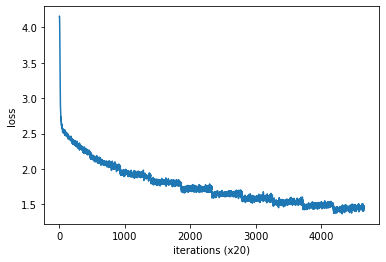

In [8]:
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [9]:
word_vecs = model.word_vecs

In [10]:
params = {}
params['word_vecs'] = word_vecs.astype(np.float16)
params['word_to_id'] = word_to_id
params['id_to_word'] = id_to_word
pkl_file = 'cbow_params.pkl'
with open(pkl_file, 'wb') as f:
    pickle.dump(params, f, -1)

### 4.3.3　CBOW モデルの評価

In [11]:
pkl_file = 'cbow_params.pkl'

with open(pkl_file, 'rb') as f:
    params = pickle.load(f)
    word_vecs = params['word_vecs']
    word_to_id = params['word_to_id']
    id_to_word = params['id_to_word']
    
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


[query] you
 we: 0.72802734375
 i: 0.693359375
 they: 0.60595703125
 your: 0.578125
 reasonable: 0.5673828125

[query] year
 month: 0.86181640625
 week: 0.77685546875
 spring: 0.7705078125
 summer: 0.74462890625
 decade: 0.69384765625

[query] car
 window: 0.57763671875
 truck: 0.5654296875
 auto: 0.564453125
 cars: 0.56396484375
 luxury: 0.5478515625

[query] toyota
 honda: 0.69287109375
 seita: 0.625
 chevrolet: 0.6220703125
 engines: 0.62158203125
 f-14: 0.6123046875


In [12]:
analogy('man', 'king', 'woman', word_to_id, id_to_word, word_vecs, top=5)


[analogy] man:king = woman:?
 artist: 4.1953125
 wife: 4.09375
 horse: 3.958984375
 kid: 3.75
 character: 3.724609375


In [13]:
analogy('king', 'man', 'queen', word_to_id, id_to_word, word_vecs, top=5)
analogy('take', 'took', 'go', word_to_id, id_to_word, word_vecs, top=5)
analogy('car', 'cars', 'child', word_to_id, id_to_word, word_vecs, top=5)
analogy('good', 'better', 'bad', word_to_id, id_to_word, word_vecs, top=5)


[analogy] king:man = queen:?
 a.m: 5.59375
 woman: 5.34765625
 carolinas: 4.625
 minute: 4.58203125
 husband: 4.5234375

[analogy] take:took = go:?
 're: 4.7265625
 were: 4.390625
 went: 4.36328125
 eurodollars: 4.32421875
 came: 4.1015625

[analogy] car:cars = child:?
 a.m: 6.7265625
 rape: 5.53125
 children: 5.08984375
 males: 4.734375
 incest: 4.72265625

[analogy] good:better = bad:?
 rather: 5.66796875
 more: 5.4765625
 less: 5.2109375
 greater: 4.82421875
 worse: 4.3046875
